# GradientBoostingRegressorの可視化

In [ ]:
# # Colabでバージョンを変更するとき、コメントアウトして実行してください
# !pip install numpy==1.22.4
# !pip install matplotlib==3.7.1
# !pip install graphviz==0.20.1
# !pip install scikit-learn==1.2.2

In [ ]:
# ライブラリのインポート
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import tree

In [ ]:
# バージョンの確認
import matplotlib
import sklearn
print(np.__version__)
print(matplotlib.__version__)
print(graphviz.__version__)
print(sklearn.__version__)

1.22.4
3.7.1
0.20.1
1.2.2


In [ ]:
# 特徴量と目的変数の設定
X_train = np.array([[10], [20], [30], [40], [50], [60], [70], [80]])
y_train = np.array([6, 5, 7, 1, 2, 1, 6, 4])

In [ ]:
# 勾配ブースティング回帰の学習と予測
model = GradientBoostingRegressor(n_estimators=2, learning_rate=0.8, criterion='squared_error', loss ='squared_error', max_depth=2, min_samples_leaf=1, ccp_alpha=0, random_state=0)
model.fit(X_train, y_train)
model.predict(X_train)

array([5.84, 5.36, 6.56, 1.44, 1.44, 1.44, 4.96, 4.96])

In [ ]:
# ハイパーパラメータの表示
model.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0,
 'criterion': 'squared_error',
 'init': None,
 'learning_rate': 0.8,
 'loss': 'squared_error',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 2,
 'n_iter_no_change': None,
 'random_state': 0,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

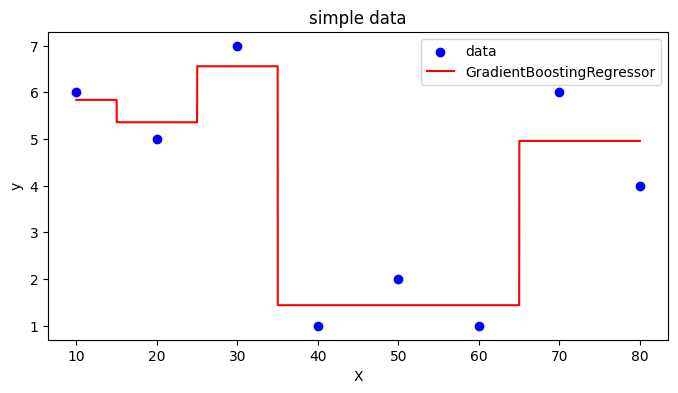

In [ ]:
# データと予測値の可視化
plt.figure(figsize=(8, 4)) #プロットのサイズ指定

# 学習データの最小値から最大値まで0.01刻みのX_pltを作成し、予測
X_plt = np.arange(X_train.min(), X_train.max(), 0.01)[:, np.newaxis]
y_pred = model.predict(X_plt)

# 学習データの散布図と予測値のプロット
plt.scatter(X_train, y_train, color='blue', label='data')
plt.plot(X_plt, y_pred, color='red', label='GradientBoostingRegressor')
plt.ylabel('y')
plt.xlabel('X')
plt.title('simple data')
plt.legend(loc='upper right')
plt.show()

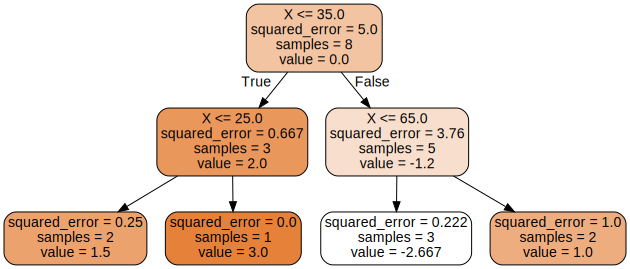

In [ ]:
# ブースティング1回目の木の可視化
dot_data = tree.export_graphviz(model.estimators_[0, 0], out_file=None, rounded=True, feature_names=['X'], filled=True)
graphviz.Source(dot_data, format='png')

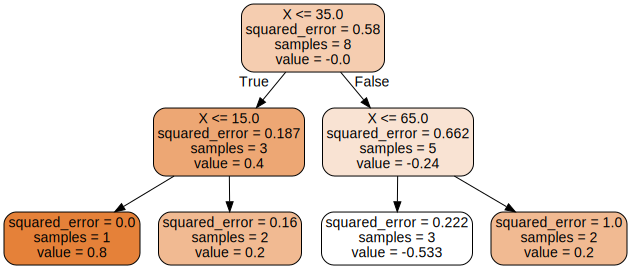

In [ ]:
# ブースティング2回目の木の可視化
dot_data = tree.export_graphviz(model.estimators_[1, 0], out_file=None, rounded=True, feature_names=['X'], filled=True)
graphviz.Source(dot_data, format='png')

#予測値の検証

In [ ]:
# 初期値の計算
pred0 = np.mean(y_train)
print(pred0)

4.0


In [ ]:
# 残差1=正解値-初期値
residual1 = y_train - pred0
print(residual1)

[ 2.  1.  3. -3. -2. -3.  2.  0.]


In [ ]:
# 重み1の計算

# 特徴量と残差1で回帰木1の学習
model_tree = DecisionTreeRegressor(criterion='squared_error', max_depth=2, min_samples_leaf=1, ccp_alpha=0, random_state=0)
model_tree.fit(X_train, residual1)

# 重み1の予測値
weight1 = model_tree.predict(X_train)
print(weight1)

[ 1.5         1.5         3.         -2.66666667 -2.66666667 -2.66666667
  1.          1.        ]


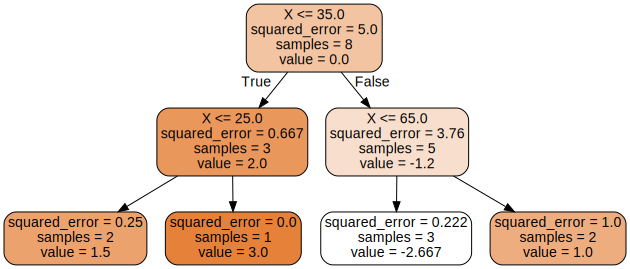

In [ ]:
# 1本目の回帰木の可視化
dot_data = tree.export_graphviz(model_tree, out_file=None, rounded=True, feature_names=['X'], filled=True)
graphviz.Source(dot_data, format='png')

In [ ]:
# 予測値1=初期値+学習率×重み1
pred1 = pred0 + 0.8 * weight1
print(pred1)

[5.2        5.2        6.4        1.86666667 1.86666667 1.86666667
 4.8        4.8       ]


In [ ]:
# 残差2=正解値-予測値1
residual2 = y_train - pred1
print(residual2)

[ 0.8        -0.2         0.6        -0.86666667  0.13333333 -0.86666667
  1.2        -0.8       ]


In [ ]:
# 重み2の計算

# 特徴量と残差2で回帰木2の学習
model_tree.fit(X_train, residual2)

# 重み2の予測値
weight2 = model_tree.predict(X_train)
print(weight2)

[ 0.8         0.2         0.2        -0.53333333 -0.53333333 -0.53333333
  0.2         0.2       ]


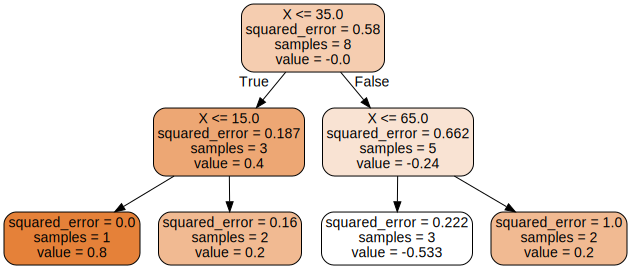

In [ ]:
# 2本目の回帰木の可視化
dot_data = tree.export_graphviz(model_tree, out_file=None, rounded=True, feature_names=['X'], filled=True)
graphviz.Source(dot_data, format='png')

In [ ]:
# 予測値2=予測値1+学習率×重み2
pred2 = pred1 + 0.8 * weight2
print(pred2)

[5.84 5.36 6.56 1.44 1.44 1.44 4.96 4.96]
